<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
<font face='Liberation serif' size=3>
    
#### **Привет, Александра!** 👋

Меня зовут Артём Пиляй. Я буду проверять твой проект «*Исследование A/B-тестирования нового алгоритма рекомендаций в развлекательном приложении*» 📱.

---

В рамках корпоративной этики мы общаемся на «ты». Но если лучше на «Вы», то важно обозначить это сразу.

---

Комментарии к проекту размещены в отдельных ячейках Markdown. Для удобства они отображаются в меню **Contents** слева. 

Я использую четыре типа комментариев:

---

✅ Главый комментарий — значит, всё сделано хорошо. А ещё здесь могут быть подсказки, как улучшить проект.

---

⚠️ Рекомендуемый к исправлению — лучше внести правки, хотя это не критично для текущего проекта. Но начиная со следующего проекта такие комментарии будут считаться критическими.

---

⛔ Обязателен к исправлению — важный комментарий, который нужно доработать, чтобы проект прошёл проверку.

---

🚩 Красный флаг — проверку пришлось прервать, так как действие в ячейке выше повлияло на весь дальнейший проект.
    
<br>    

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

Важно:
- Не перемещай и не удаляй мои комментарии. Если они будут удалены, я верну последнюю версию проекта, где они сохранились.
- Если возникнут вопросы, их можно задать в шаблоне, который я оставил ниже — он появится в меню Contents, и я точно его увижу.
	
</div>

🏁 [Перейти к итогам ревью](#results)

<a id="start"></a>

# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Вводная часть

---
    
✅ Отлично, что уже есть:    

- Название проекта.    
- Понятная бизнес-задача.
- Описание данных.    

Это сразу делает проект более логичным и понятным для читателя. 
    
---    
    
⚠️ Чтобы проект выглядел законченным и человек, который будет знакомиться с твоим портфолио, понимал суть исследования, рекомендую добавить:

- План работы.
    
Это небольшое улучшение, которые сделают проект более презентабельным и понятным для заказчика или проверяющего. 😉    
    
---

💬 Здесь можно оставить комментарий

---

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from statsmodels.stats.power import NormalIndPower
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    
##### ✅ Структура кода
    
---
    
⚠️ Правильно, что разделяешь импорт от основного кода, осталось перенести все импорты библиотек в одну ячейку. Это соответствует стилю PEP 8 и делает код более структурированным и понятным.

Это помогает:
- Сразу видеть, какие библиотеки используются в проекте.
- Избежать дублирования импортов в разных частях кода.
- Облегчить отладку и переносимость проекта.
    
Подробнее о PEP 8 можно прочитать в статье [*PEP 8 - руководство по написанию кода на Python*](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html).    
    
---
    
💬 ✅ спасибо, так правда нагляднее
    
---
    
✅ И тебе спасибо. Не забывай про это в будущих проектах.    

In [2]:
sessions_history=pd.read_csv('/datasets/sessions_project_history.csv')
sessions_history.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [3]:
sessions_per_user = sessions_history.groupby("user_id")["session_id"].nunique().reset_index()
sessions_per_user.columns = ["user_id", "unique_sessions"]
sessions_per_user


,user_id,unique_sessions
0,00005FB6A13A6FBE,2
1,0000B15A18D77ED9,3
2,0000C4E3A4A571A9,2
3,000293FAF9E67A81,4
4,00029C5AE889A6C3,2
...,...,...
134034,FFFCDE7746148710,4
134035,FFFDD413285E753F,3
134036,FFFECBA0F2578AB0,2
134037,FFFEDB68228B5F21,5


In [4]:
top_user_id = sessions_per_user.loc[sessions_per_user['unique_sessions'].idxmax(), 'user_id']
top_user_data = sessions_history[sessions_history['user_id'] == top_user_id]
display(top_user_data)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Оптимизация кода

---    
    
✅  В таких случаях лучше использовать `.value_counts().idxmax()`, чтобы динамически определять наиболее частый `user_id`.

`idmax` помогает упростить и ускорить анализ данных.

Преимущества метода:
- Оптимизация кода — сокращает количество вычислений по сравнению с альтернативными методами.
- Быстродействие — позволяет находить нужное значение без дополнительной сортировки.
- Читаемость — код становится лаконичным и понятным.
- Эффективность — снижает нагрузку при обработке больших объемов данных.

Подробнее можно ознакомиться в документации по Pandas: [Pandas idxmax()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html)

---

💬 Здесь можно оставить комментарий

---

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [5]:
df_grp = (
    sessions_history.groupby(['session_date']).agg(
        {
        'user_id': 'nunique',
        'registration_flag':'sum'
    })
    .reset_index()
)

df_grp.columns=["date","amount_users","registr_users"]
df_grp

,date,amount_users,registr_users
0,2025-08-11,3919,169
1,2025-08-12,6056,336
2,2025-08-13,8489,464
3,2025-08-14,10321,625
4,2025-08-15,14065,840
5,2025-08-16,12205,916
6,2025-08-17,11200,833
7,2025-08-18,10839,860
8,2025-08-19,12118,831
9,2025-08-20,13514,1008


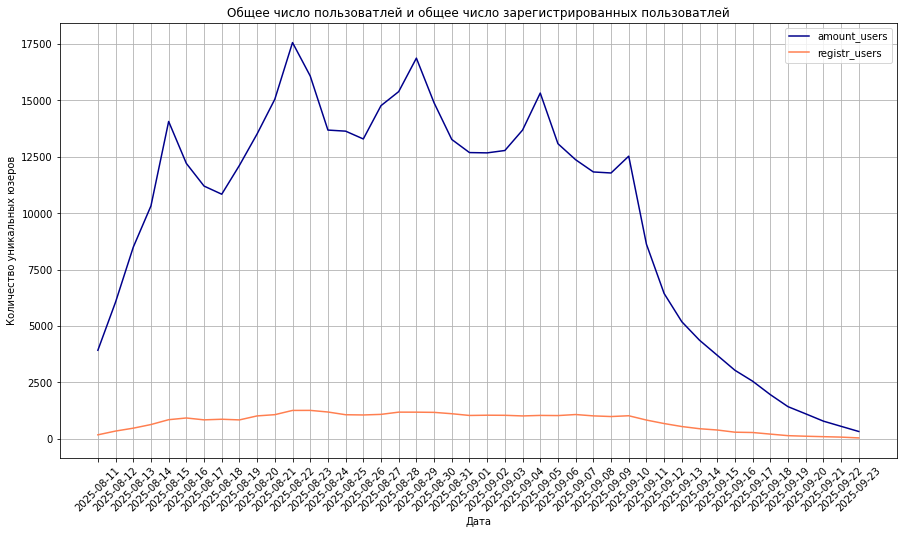

In [6]:
x = df_grp.date.unique()
y_a = df_grp['amount_users']
y_b = df_grp['registr_users']

plt.figure(figsize=(15, 8))
plt.plot(x, y_a, label ='amount_users', color='darkblue')
plt.plot(x, y_b,label ='registr_users', color='coral')

plt.xlabel("Дата")
plt.ylabel("Количество уникальных юзеров")
plt.legend()
plt.title('Общее число пользоватлей и общее число зарегистрированных пользоватлей')
plt.xticks(rotation=45)
plt.grid()
plt.show()

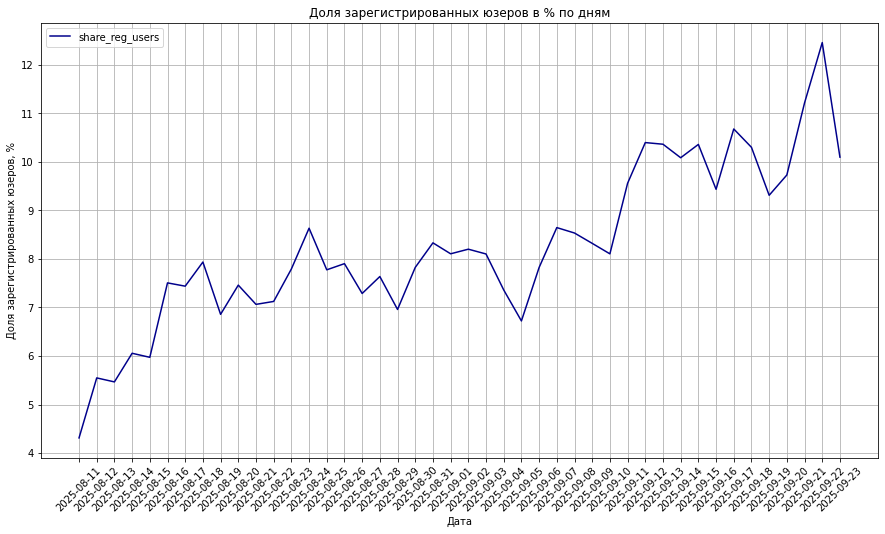

In [7]:
share_reg_users=df_grp['registr_users']/df_grp['amount_users']*100
x = df_grp.date.unique()
y = share_reg_users


plt.figure(figsize=(15, 8))
plt.plot(x, y,label='share_reg_users', color='darkblue')


plt.xlabel("Дата")
plt.ylabel("Доля зарегистрированных юзеров, %")
plt.legend()
plt.title('Доля зарегистрированных юзеров в % по дням')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Анализ числа регистраций

---    
    
✅ Хорошо.

---

💬 Здесь можно оставить комментарий

---

По графику видим, что доля зарегисnрированных юзеров за период наблюдения растет, начиная с 04.09.2025.

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Анализ числа регистраций

---

✅ Расчет числа регистраций выполнен верно. 

---    
    
⚠️ Но нет анализа. Представлен только код, но нет выводов.

Выводы — ключевой этап работы аналитика, это интерпретация результатов исследования. Представь врача, который осматривает пациента, но не ставит диагноз и не назначает лечение. Какую ценность он тогда приносит?

Например, в задании «**Доля пользователей, просмотревших более четырёх страниц**» изучена динамика метрики, на которую направлен A/B-тест. Это ключевой момент в исследовании исторических данных, и без выводов он теряет аналитическую ценность.

То же самое касается графиков: без объяснений они превращаются в обычные изображения, которые не несут смысла.

Важно учитывать, что у заказчика тетрадка может открыться с ячейками, в которых не отображаются результаты выполнения кода. В таком случае он увидит только код — без чисел и графиков, а значит, исследование потеряет смысл.    
            
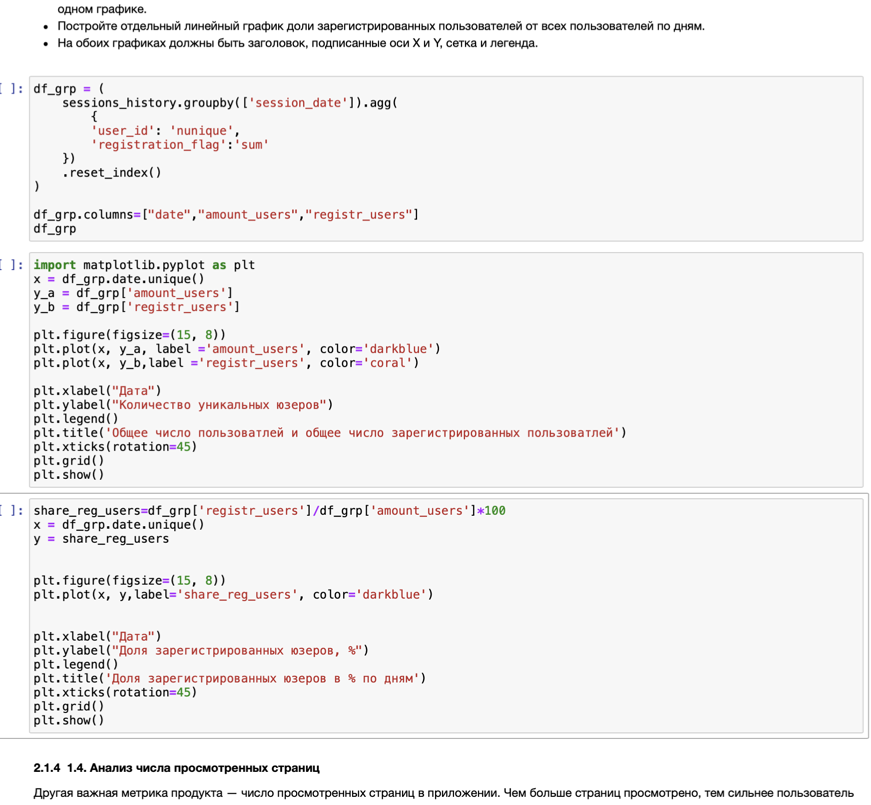  

---

💬 Здесь можно оставить комментарий
    
---    

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [8]:
sessions_per_page_counter = sessions_history.groupby("page_counter")["session_id"].nunique().reset_index()
sessions_per_page_counter.columns = ["page_counter", "unique_sessions"]
sessions_per_page_counter

,page_counter,unique_sessions
0,1,29160
1,2,105536
2,3,166690
3,4,105569
4,5,26288
5,6,2589
6,7,92


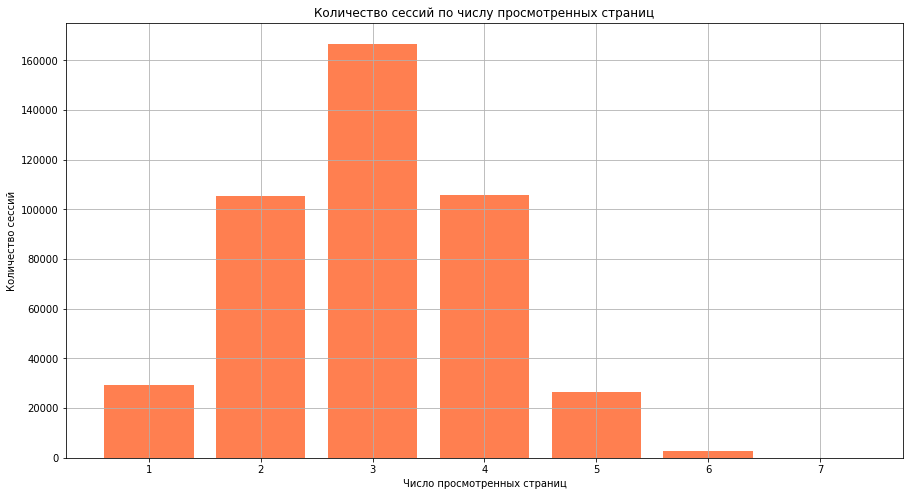

In [9]:
x = sessions_per_page_counter.page_counter
y = sessions_per_page_counter['unique_sessions']

plt.figure(figsize=(15, 8))
plt.bar(x, y,label ='', color='coral')

plt.xlabel("Число просмотренных страниц")
plt.ylabel("Количество сессий")
plt.title('Количество сессий по числу просмотренных страниц')

plt.grid()
plt.show()

За 1 сессию большая честь юзеров просматривает 3 страницы 

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Корректное оформление графика

---    
    
Отлично, выбран правильный тип графика, а также добавлены название и подписи осей.

Преимущества такого подхода:
- Наглядность — столбчатая диаграмма хорошо подходит для сравнения дискретных данных.
- Читаемость — благодаря названию и подписям осей график легко интерпретировать.

Подробнее о выборе графиков можно прочитать в статье: [Matplotlib – Визуализация данных](https://matplotlib.org/stable/plot_types/index.html).

---

💬 Здесь можно оставить комментарий

---

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [10]:
sessions_history['good_sessions'] = 0
sessions_history.loc[sessions_history['page_counter'] >= 4, 'good_sessions'] = 1
sessions_history.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,good_sessions
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone,0
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android,1
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC,1
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android,1
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android,0


In [11]:
gr_by_date = (
    sessions_history.groupby(['session_date']).agg(
        {
        'session_id': 'nunique',
        'good_sessions':'sum'
    })
    .reset_index()
)

gr_by_date.columns=["date","amount_sessions","amount_good"]
gr_by_date

,date,amount_sessions,amount_good
0,2025-08-11,3919,1226
1,2025-08-12,6056,1829
2,2025-08-13,8489,2604
3,2025-08-14,10321,3262
4,2025-08-15,14065,4289
5,2025-08-16,12205,3737
6,2025-08-17,11200,3557
7,2025-08-18,10839,3366
8,2025-08-19,12118,3791
9,2025-08-20,13514,4148


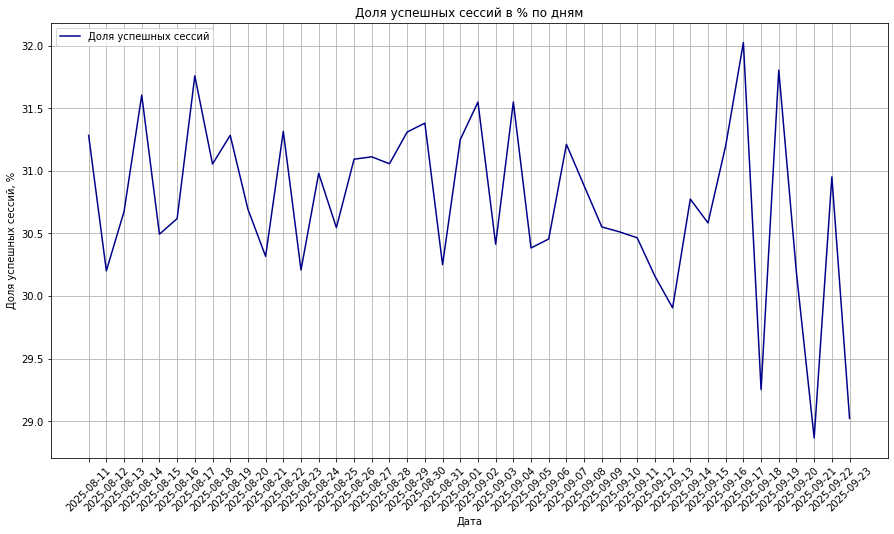

In [12]:
share_good_sessions=gr_by_date['amount_good']/gr_by_date['amount_sessions']*100
x = df_grp.date.unique()
y = share_good_sessions


plt.figure(figsize=(15, 8))
plt.plot(x, y,label='Доля успешных сессий', color='darkblue')


plt.xlabel("Дата")
plt.ylabel("Доля успешных сессий, %")
plt.legend()
plt.title('Доля успешных сессий в % по дням')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Доля пользователей, просмотревших более четырёх страниц

---

✅ Все рассчитано корректно! 



---

💬 Здесь можно оставить комментарий

---

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [13]:

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2 # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Связь ошибки II рода и мощности критерия

---    

✅  Так же можно было связать ошибку второго рода и мощность критерия через `power = 1 - beta`. Это важный аспект статистического анализа, который помогает оценить вероятность обнаружения реального эффекта.  

Преимущества такого подхода:
- Позволяет осознанно выбирать размер выборки для теста.  
- Помогает сбалансировать риск ложных отрицательных результатов.  
- Улучшает интерпретацию результатов A/B-тестирования.  

Кстати, есть еще очень интересный бесплатный курс от Практикума по A/B-тестированию — там можно более детально познакомиться с расчетом длительности теста:  
[Practicum – Основы статистики](https://practicum.yandex.ru/profile/statistics-basic/)  

---

💬 Спасибо за совет!

---
    
✅ Пожалуйста. :)   

#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [14]:
# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = sessions_history.groupby('session_date')['user_id'].nunique().mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(17441*2/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 4 дней


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Расчёт среднего числа пользователей в день

---

✅ Все правильно, 4 дня. Так же следует учитывать, что в последние дни было снижение активности пользователей, поэтому среднее за весь период не будет однозначно характеризовать размер активной аудитории.

---

💬 Здесь можно оставить комментарий

---

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [15]:
sessions_test_part=pd.read_csv('/datasets/sessions_project_test_part.csv')
sessions_test_part.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


In [16]:
amount_a=sessions_test_part[(sessions_test_part['test_group']=='A') & (sessions_test_part['session_date']=='2025-10-14')]['user_id'].nunique()
amount_b=sessions_test_part[(sessions_test_part['test_group']=='B')& (sessions_test_part['session_date']=='2025-10-14')]['user_id'].nunique()
amount=sessions_test_part['user_id'].nunique()
print(amount_a, amount_b, amount)

1477 1466 2943


In [17]:

percent = round((amount_a-amount_b)/amount_a*100,2)
print(f"Процентная разница между группами составляет {percent}%")



Процентная разница между группами составляет 0.74%


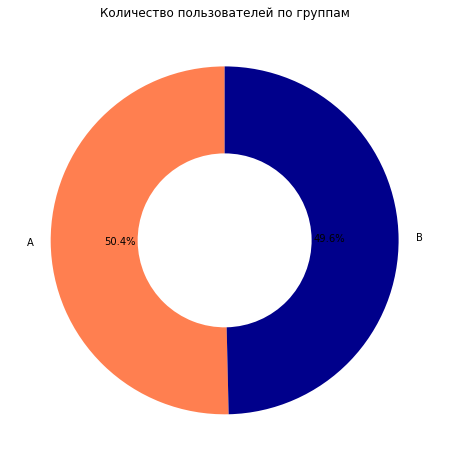

In [18]:
labels = ['A','B']
sizes = [amount+percent*amount/100, amount-percent*amount/100]
colors = ['coral','darkblue']


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.5})


plt.title('Количество пользователей по группам')
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">


##### ✅ Проверка распределения пользователей

---

✅ В этом шаге все отлично.

---

💬 Здесь можно оставить комментарий

---

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [19]:
a_users=sessions_test_part[sessions_test_part['test_group']=='A']['user_id']
b_users=sessions_test_part[sessions_test_part['test_group']=='B']['user_id']
intersection = list(set(a_users) & set(b_users))
print(F"Количество пользователей,которые встречаются одновременно в группах A и B - {len(intersection)}")

Количество пользователей,которые встречаются одновременно в группах A и B - 0


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Проверка пересечений пользователей между группами

---

✅ Здорово, что умеешь использовать множества для проверки пересечений пользователей между группами A/B.

Альтернативный способ — использовать группировку, что может быть полезно при работе с большими данными:

```py
sessions_test_part.groupby('user_id').agg({'test_group': 'nunique'}).query('test_group > 1')
```

Этот метод позволяет сразу отфильтровать пользователей, которые встречаются в обеих группах.

---

💬 Здесь можно оставить комментарий

---

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


In [20]:
A=sessions_test_part[sessions_test_part['test_group']=='A']
B=sessions_test_part[sessions_test_part['test_group']=='B']

a_grp_device=A.groupby('device')['user_id'].nunique().reset_index()
a_grp_device.columns=['device', 'amount']
a_grp_device['share_amount']=round(a_grp_device['amount']/A['user_id'].nunique(),2)
a_grp_device

,device,amount,share_amount
0,Android,656,0.44
1,Mac,156,0.11
2,PC,369,0.25
3,iPhone,296,0.20


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">


##### ✅ Расчёт распределения пользователей по устройствам

---

⛔️ Сейчас доля завышена, так как считаются все пользователи, а не только уникальные.

Важно учитывать число уникальных пользователей для каждого устройства.

---

💬 ✅Заменила count() на nunique()

---
    
✅ Все правильно.    

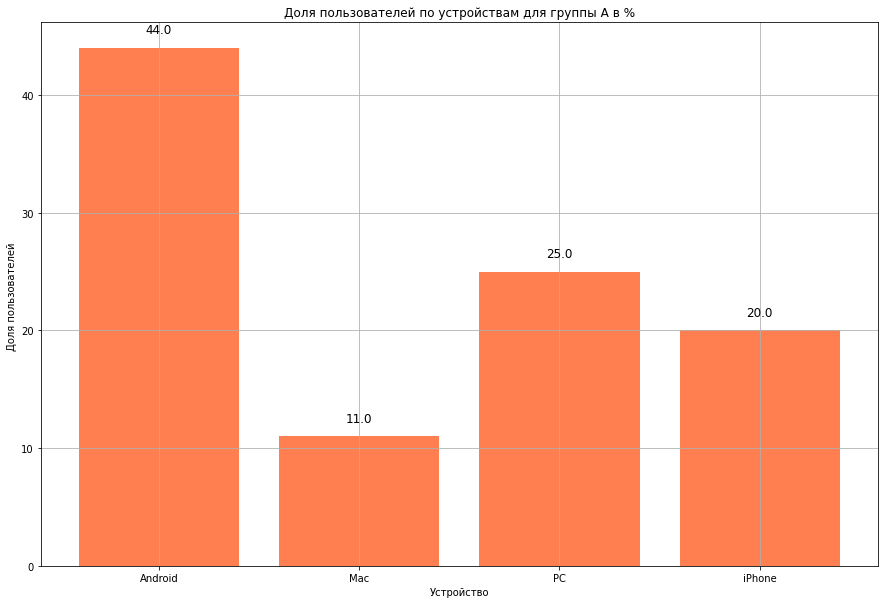

In [21]:
x = a_grp_device['device']
y = a_grp_device ['share_amount']*100

plt.figure(figsize=(15, 10))

plt.bar(x, y,label ='', color='coral')

for i, y in enumerate(y):
    plt.text(i, y + 1, str(y), ha='center', va='bottom', fontsize=12)


plt.xlabel("Устройство")
plt.ylabel("Доля пользователей ")

plt.title('Доля пользователей по устройствам для группы А в %')

plt.grid()
plt.show()

In [22]:
b_grp_device=B.groupby('device')['user_id'].nunique().reset_index()
b_grp_device.columns=['device', 'amount']
b_grp_device['share_amount']=round(b_grp_device['amount']/B['user_id'].nunique(),2)
b_grp_device

,device,amount,share_amount
0,Android,668,0.46
1,Mac,148,0.10
2,PC,381,0.26
3,iPhone,269,0.18


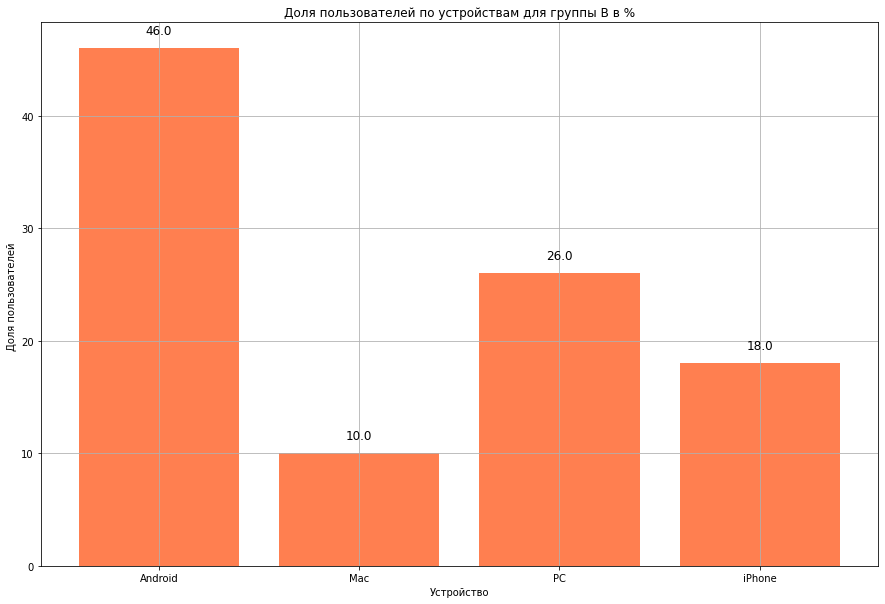

In [23]:
x = b_grp_device['device']
y = b_grp_device ['share_amount']*100

plt.figure(figsize=(15, 10))

plt.bar(x, y,label ='', color='coral')

for i, y in enumerate(y):
    plt.text(i, y + 1, str(y), ha='center', va='bottom', fontsize=12)


plt.xlabel("Устройство")
plt.ylabel("Доля пользователей ")
plt.title('Доля пользователей по устройствам для группы B в %')
plt.grid()
plt.show()

**Вывод:** пользователи по устройствам распределены равномерно.

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


In [24]:
a_grp_region=A.groupby('region')['user_id'].nunique().reset_index()
a_grp_region.columns=['region', 'amount']
a_grp_region['share_amount']=round(a_grp_device['amount']/A['user_id'].nunique(),2)
a_grp_region

,region,amount,share_amount
0,CIS,644,0.44
1,EU,224,0.11
2,MENA,609,0.25


In [25]:
b_grp_region=B.groupby('region')['user_id'].nunique().reset_index()
b_grp_region.columns=['region', 'amount']
b_grp_region['share_amount']=round(a_grp_device['amount']/B['user_id'].nunique(),2)
b_grp_region

,region,amount,share_amount
0,CIS,645,0.45
1,EU,217,0.11
2,MENA,604,0.25


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Расчёт распределения пользователей по регионам

---

⛔️  Аналогично девайсам, нужно использовать `groupby` и `nunique` и затем нормировать данные по группам.
    
---    

💬 ✅

---
    
✅ И здесь все правильно.    

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">  

##### ✅  Равномерность разделения пользователей по регионам

---

⚠️ По условию задания "Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании."

Оптимальнее использовать такой столбчатую диаграмму с двумя столбцами рядом.


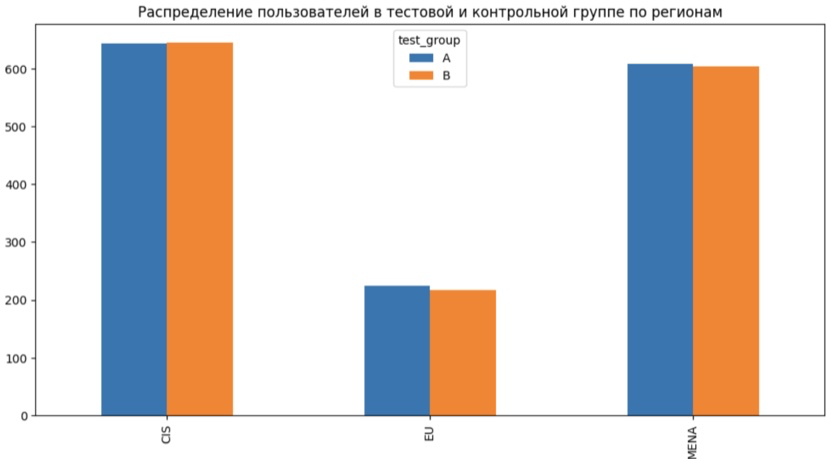

---

💬 Здесь можно оставить комментарий

---
    
✅ Отлично.    

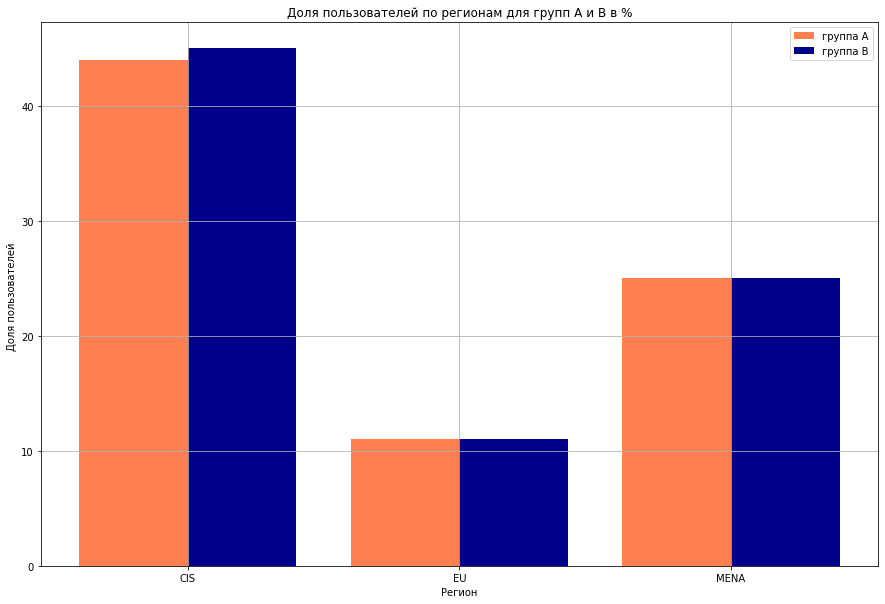

In [26]:
labels = b_grp_region['region']
x = np.arange(len(labels))
y_a = a_grp_region ['share_amount']*100
y_b = b_grp_region ['share_amount']*100
width=0.4
plt.figure(figsize=(15, 10))

plt.bar(x-width/2,y_a, width, label ='группа А', color='coral')
plt.bar(x+width/2,y_b, width, label ='группа B', color='darkblue')


plt.xlabel("Регион")
plt.xticks(x, labels)
plt.ylabel("Доля пользователей ")
plt.legend()
plt.title('Доля пользователей по регионам для групп A и B в %')

plt.grid()
plt.show()

Распределение пользоватлей по регионам в тестовой и контрольной группах практически не различается.

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

   **На основе проведенного анализа можно заключить, что:**
1. Процентная разница между группами составляет 0,74%, что не критично.
2. Пересечения между тестовой и контрольной группой не было обнаружено.
3. Распределение пользователей тестовой и контрольной группами
 - по усройствам: колеблется не более чем на на 2%
 - по регионам: колеблется не более чем на 1%
 
 Тест проходит корректно.
 

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Вывод по результатам A/B-теста

---

✅ Хорошо, можно переходить к проверке результатов A/B-теста.

---    

💬 Здесь можно оставить комментарий

---

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [27]:
sessions_test=pd.read_csv('/datasets/sessions_project_test.csv')
sessions_test.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B


In [28]:
sessions_test['good_sessions']=0
sessions_test.loc[sessions_test['page_counter'] >= 4, 'good_sessions'] = 1
sessions_test.head(20)        

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_sessions
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0
5,31F7A42B32103403,E9B64B779C3348ED,2025-10-20,2025-10-20 17:09:41,2025-10-19,2,0,2,CIS,PC,B,0
6,87C09E3E3B334959,FECFF83C13DC9364,2025-10-22,2025-10-22 23:51:42,2025-10-20,3,0,4,CIS,iPhone,B,1
7,457F2674E87EF6E7,14F71C18BE2CEC08,2025-10-19,2025-10-19 11:49:11,2025-10-19,1,0,3,MENA,Mac,A,0
8,57F342451921D207,76EFA055599ADE3C,2025-10-19,2025-10-19 18:47:43,2025-10-19,1,0,3,CIS,PC,A,0
9,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B,0


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [29]:
A=sessions_test[sessions_test['test_group']=='A']
B=sessions_test[sessions_test['test_group']=='B']
grp_a_by_date=A.groupby('session_date')['session_id'].nunique().reset_index()
grp_a_by_date.columns=['session_date','amount_a']
grp_b_by_date=B.groupby('session_date')['session_id'].nunique().reset_index()
grp_b_by_date.columns=['session_date','amount_b']
sessions_by_date = pd.merge(grp_a_by_date, grp_b_by_date, on='session_date', how='outer')
display(sessions_by_date)


,session_date,amount_a,amount_b
0,2025-10-14,1502,1628
1,2025-10-15,2235,2283
2,2025-10-16,3280,3241
3,2025-10-17,4089,4054
4,2025-10-18,5013,5059
5,2025-10-19,6535,6779
6,2025-10-20,5837,6089
7,2025-10-21,3927,3981
8,2025-10-22,3083,3111
9,2025-10-23,2470,2548


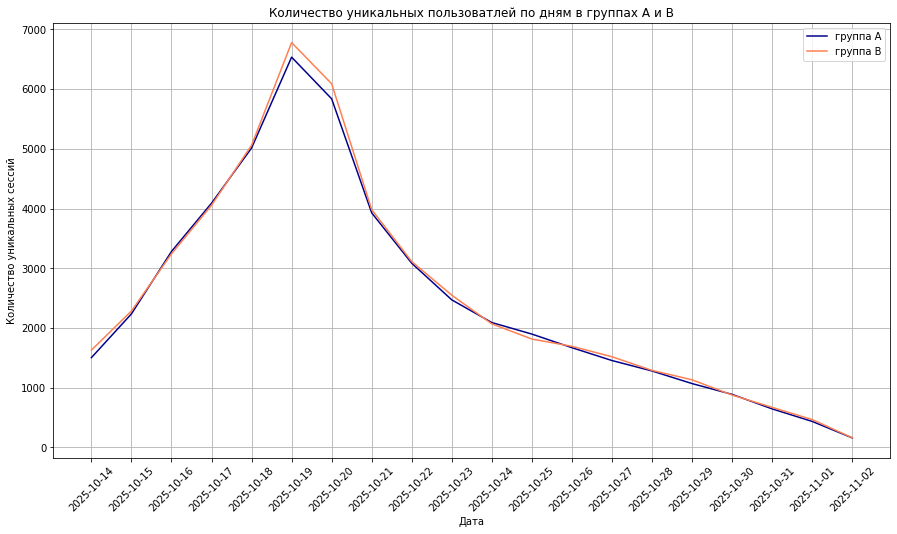

In [30]:
x = sessions_by_date['session_date']
y_a = sessions_by_date['amount_a']
y_b = sessions_by_date['amount_b']

plt.figure(figsize=(15, 8))
plt.plot(x, y_a, label ='группа А', color='darkblue')
plt.plot(x, y_b,label ='группа B', color='coral')


plt.xlabel("Дата")
plt.ylabel("Количество уникальных сессий")
plt.legend()
plt.title('Количество уникальных пользоватлей по дням в группах A и B')
plt.xticks(rotation=45)
plt.grid()
plt.show()

По графику и расчету видим, что количество пользователей по дням в группах не раздличаются, проверим статистическую значимость этй гипотезы. 
**Формулировка гипотезы**

H₀ (нулевая гипотеза) — количество уникальных дневных сессий `не различается` между тестовой и контрольной группами.

H₁ (альтернативная гипотеза) — количество уникальных дневных сессий `различается` между тестовой и контрольной группами.

In [31]:

alpha = 0.05 ## на каком уровне значимости проверяем гипотезу о равенстве выборочных средних
stat_ttest, p_value_ttest = ttest_ind(
    sessions_by_date['amount_a'], 
    sessions_by_date['amount_b'], 
    alternative='two-sided' 
) 

if p_value_ttest>alpha:
    print(f'p-value теста Стьюдента ={round(p_value_ttest, 2)}')
    print('Нулевая гипотеза находит подтверждение! Выборочные средние в группах A и B равны')
else:
    print(f'p-value теста Стьюдента ={round(p_value_ttest, 2)}')
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах A и B не равны, и в группе B больше')
    

p-value теста Стьюдента =0.94
Нулевая гипотеза находит подтверждение! Выборочные средние в группах A и B равны


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Формулировка гипотез перед статистическим тестом

---

⚠️ Ты проверяешь то, чего нет. 😉

Это грубая ошибка.

Перед проверкой теста важно всегда формулировать нулевую (H₀) и альтернативную (H₁) гипотезы, чтобы было понятно, какие различия мы проверяем.

В нулевой гипотезе обычно утверждают отсутствие эффекта или различий (например, "равны" или "не отличаются"), а альтернативная гипотеза (H₁) предполагают наличие эффекта или различия (например, "отличаются", "больше" или "меньше").
    
Если направление не задано, то:   
* H₀ - равны;   
* H₁ - отличаются.   

**Значит**:

- H₀ (нулевая гипотеза) — количество уникальных дневных сессий `не различается` между тестовой и контрольной группами.
- H₁ (альтернативная гипотеза) — количество уникальных дневных сессий `различается` между тестовой и контрольной группами.

    
Значения nan, 0 и 1 первый признак некорректного расчета, это может указывать на проблемы в расчётах или наличие идентичных или вырожденных данных.    
    
Подробнее можно почитать [здесь](https://allatambov.github.io/psms/pdf/hypo-test.pdf)    


---

💬 Здесь можно оставить комментарий

---
    
✅ Умница! Не забывай про них, от этого зависит что и как мы проверяем.    

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [32]:
a_group=sessions_test[sessions_test['test_group']=='A']
b_group=sessions_test[sessions_test['test_group']=='B']
a_group.head(20)
b_group.head(20)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_sessions
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0
5,31F7A42B32103403,E9B64B779C3348ED,2025-10-20,2025-10-20 17:09:41,2025-10-19,2,0,2,CIS,PC,B,0
6,87C09E3E3B334959,FECFF83C13DC9364,2025-10-22,2025-10-22 23:51:42,2025-10-20,3,0,4,CIS,iPhone,B,1
9,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B,0
10,E3D2FC1168EB2558,B585AABE5484C3D1,2025-10-19,2025-10-19 13:13:23,2025-10-16,3,0,3,MENA,Android,B,0
11,2E1AE08A3A687FC4,2B186C8BF8DA8AE7,2025-10-17,2025-10-17 12:41:17,2025-10-15,2,0,3,CIS,iPhone,B,0
12,9E808F04A69C9D34,D4C3B30B00F5DE94,2025-10-20,2025-10-20 18:45:59,2025-10-18,2,0,4,CIS,PC,B,1
19,99C08B471B90B14F,85D67806A17E00A4,2025-10-24,2025-10-24 18:52:23,2025-10-19,3,0,2,MENA,iPhone,B,0


In [33]:
share_good_sessions_a=round(a_group['good_sessions'].sum()/a_group['session_id'].count()*100,2)
share_good_sessions_b=round(b_group['good_sessions'].sum()/b_group['session_id'].count()*100,2)
print(f'Доля успешных сессий в группе A: {share_good_sessions_a}%, в группе B:{share_good_sessions_b}%')

Доля успешных сессий в группе A: 30.77%, в группе B:31.83%


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Расчёт доли успешных сессий

---

✅ Отлично. Всё правильно: доли успешных сессий рассчитаны корректно.



---

💬 Здесь можно оставить комментарий
    
---    

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

**Формулировка гипотезы**

H₀ (нулевая гипотеза) — доля успешных сессий  в тестовой группе (В) не отличается от доли успешных сессий в контрольной группе (А).

H₁ (альтернативная гипотеза) — доля успешных сесий в тестовой группе выше чем в контрольной группе.

In [34]:
#считаем размеры выборок
n_a=a_group.shape[0]
n_b=b_group.shape[0]
n_a, n_b

(49551, 50454)

In [35]:
#считаем количество успехов
m_a=a_group['good_sessions'].sum()
m_b=b_group['good_sessions'].sum()
m_a,m_b

(np.int64(15248), np.int64(16059))

In [36]:
#проверяем стат значимость гиоптезы: доля успехов в тестовой выборке больше доли успехов в исходной выборке
alpha = 0.05

stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],
    [n_a, n_b],
    alternative='smaller' # так как H_1: p_a < p_b
)
p_value_ztest


if p_value_ztest > alpha:
    print(f'pvalue={p_value_ztest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_ztest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=0.0001574739988036123 < 0.05
Нулевая гипотеза не находит подтверждения!


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Проверка статистической значимости

----

✅ Статистический тест проведён корректно, p-value рассчитано правильно, и сделаны верные выводы относительно значимости различий. Такой подход позволяет уверенно оценить влияние изменений в метрике.


---

💬 Здесь можно оставить комментарий

---

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.


# 📊 A/B Тест: Анализ доли успешных сессий

## Цель
Проверить, повлияло ли изменение алгоритма рекомендаций на **долю успешных сессий** у пользователей приложения.

---

##  Данные
- **Группы**: A (контрольная) и B (тестовая) по 17441 пользователя в каждой
- **Период теста**: 01.10.2025 – 14.10.2025: 4 дня
- **Метрика**: доля успешных сессий, где успешные — сессии, где page_counter >= 4

---

##  Методы
- Был проведен расчет доли успешных сессий по группам
- Была проведена оценка статистической значимости различий между группами проводилась с помощью  z-теста для пропорций 

---

## Результаты

**Доля успешных сессий:**

| Группа | Успешные сессии | Всего сессий | Доля |
|--------|------------------|---------------|-------|
| **A**  | 15248              | 49551          | 30.77% |
| **B**  | 16059              | 50454          |31.83%  |

---

##  Статистический тест


В результате проведенного z-теста pvalue=0.0001574739988036123 < 0.05, то есть можно считать результат статистичеси значимым.


## Рекомендации

Так как в группе B наблюдается рост доли успешных сессий на 1,1% по сравнению с группой А, и результат является статистически значимым, но MDE — 3%, не могу пока рекомендовать внедрение нового алгоритма. Можно провести повторный более чувствительный тест, если нужно.


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ⚠️ Итоговый аналитический вывод

---
     
✅ Правильный расчет. Видно, что метрика улучшилась, и тест это подтвердил, что говорит об успешности A/B-эксперимента! 🎯   
    
---
    
⚠️ Стоит учитывать, что из-за осторожного подхода можно упустить потенциальную прибыль. Даже небольшое, но статистически значимое улучшение в одной из ключевых метрик может привести к росту доходов в долгосрочной перспективе. Если тест демонстрирует положительную динамику и статистическую значимость, имеет смысл рассмотреть внедрение, особенно если дальнейшая оптимизация способна усилить эффект.

Конечно, важно анализировать и другие показатели, но полное исключение изменений из-за незначительного прироста может замедлить развитие продукта и снизить конкурентоспособность. 

---

💬 Здесь можно оставить комментарий

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    
## 🏁 **Итоги ревью**
<a id="results"></a>
[В начало](#start)

---

⛔️ Александра, спасибо за работу. Осталось исправить несколько комментариев и можно идти к заказчику. Молодец! 👍
    
Для удобства, комментарии которые нужно скорректировать я добавил в меню **Contents** слева.
    
Жду новую версию проекта. 🙂

---

💬 Спасибо за приятное и обстоятельное ревью!
    
---
    


<div style="background-color: black; border: 2px solid #444; border-radius: 20px; padding: 15px 25px; display: inline-block; color: white;">

#### ✌️ Поздравляю, **проект принят!** 🥳 🎉 
    

Александра, ты умница!    

И тебе спасибо, рад, что понравилось. Критических замечаний нет. 

Если у тебя есть вопросы, их можно задать через куратора.
 

    
**Успехов в дальнейшем обучении и карьере! 🚀**

**Артем 🤝**    

<img src="https://lifeo.ru/wp-content/uploads/gif-salyut-10.gif"> 
    
---
    
## 📖 **Полезные ссылки**

* [Работа в Яндексе](https://yandex.ru/jobs/pages/analytics_interview?ysclid=l84s63fs1g790141490)
* [Настройте свой Jupyter Notebook правильно](https://medium.com/nuances-of-programming/настройте-свой-jupyter-notebook-правильно-faef14c89434)    
* [PEP 8 – Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)    
* [Обработка пропусков в данных](https://loginom.ru/blog/missing)  
* [Разделение данных с помощью qcut и cut в Pandas](https://dfedorov.spb.ru/pandas/Разделение%20данных%20в%20Pandas%20с%20помощью%20qcut%20и%20cut.html?)  
* [Официальная документаци метода qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
* [Подробное руководство по группировке и агрегированию с помощью pandas](https://dfedorov.spb.ru/pandas/Подробное%20руководство%20по%20группировке%20и%20агрегированию%20с%20помощью%20pandas.html?ysclid=lcmm6rtg2w602526506)
* [Проверка статистических гипотез. (21 мая 2020 г.)](https://allatambov.github.io/psms/pdf/hypo-test.pdf)    
* [Шпаргалка по визуализации данных в Python с помощью Plotly](https://habr.com/ru/articles/502958/) 
* [Тест гигиены визуализации данных](https://bar-or-pie.dianov.org)    
* [Задачки SQL](https://habr.com/ru/company/dcmiran/blog/500360/)    
* [7 cайтов для оттачивания навыка написания SQL запросов на 2020 год](https://techrocks.ru/2019/11/22/7-sites-to-perfect-sql-query-writing-skills/)
* [Главред помогает очистить текст от словесного мусора, проверяет на соответствие информационному стилю.](https://glvrd.ru)

</div>    